In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import data
path='F:/Munesh Backup/Munesh/Imarticus/Projects/Principal Component Analysis/train.csv'
house_price=pd.read_csv(path)
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#target variable
target=house_price['SalePrice']
data=house_price.drop('SalePrice',axis=1)

In [5]:
# splitting categorical and numerical data
data_num=data.select_dtypes(exclude='object')

In [6]:
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [7]:
data_cat=data.select_dtypes(include='object')
data_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


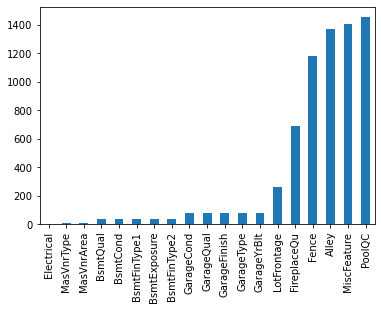

In [8]:
#Missing data analysis 
Null=data.isnull().sum()
Null=Null[Null>0]
Null.sort_values(inplace=True)
Null.plot.bar()

In [9]:
# Numerical Percentage Null Values
num_null_percent=(data_num.isnull().sum()/data_num.isnull().count()).sort_values(ascending=False)
num_null_percent=num_null_percent[num_null_percent>0]
num_null_percent


LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64

In [10]:
# Categorical Percentage Null Values
cat_null_percent=(data_cat.isnull().sum()/data_cat.isnull().count()).sort_values(ascending=False)
cat_null_percent=cat_null_percent[cat_null_percent>0]
cat_null_percent

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [11]:
#dropping Numerical values with more than 15% of null values
num_null_percent=num_null_percent[num_null_percent>0.15]
num_null_col=num_null_percent.index.tolist()
print(num_null_col)
data_num.drop(num_null_col,axis=1,inplace=True)
data_num.isnull().sum()

['LotFrontage']


C:\Users\Shakeel\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [12]:
# Imputing  remaining null values with median
data_num=data_num.fillna(data_num.median())
data_num.isnull().sum().sum()

0

In [13]:
# Removing Categorical columns with more than 15%
cat_null_percent=cat_null_percent[cat_null_percent>0.15]
cat_null_columns=cat_null_percent.index.tolist()
print(cat_null_percent)
data_cat.drop(cat_null_columns,axis=1,inplace=True)
data_cat.isnull().sum().sum()

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
dtype: float64


520

In [14]:
# Imputing missing data with mode
for col in data_cat.columns:
    data_cat[col]=data_cat[col].fillna(data_cat[col].mode()[0])
data_cat.isnull().sum().sum()

<ipython-input-14-ddabad794e8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat[col]=data_cat[col].fillna(data_cat[col].mode()[0])


0

In [15]:
# dummy variable for columns 
data_dummy_cat=pd.get_dummies(data_cat,drop_first=True)
data_dummy_cat.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
#Scaling Numerical Data
sc=StandardScaler()
data_num_sc=sc.fit_transform(data_num)
data_num_sc

array([[-1.73086488,  0.07337496, -0.20714171, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-1.7284922 , -0.87256276, -0.09188637, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [-1.72611953,  0.07337496,  0.07347998, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 1.72611953,  0.30985939, -0.14781027, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [ 1.7284922 , -0.87256276, -0.08016039, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [ 1.73086488, -0.87256276, -0.05811155, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [17]:
#creating Dataframe for numerical columns
data_num_df=pd.DataFrame(data_num_sc,columns=data_num.columns)
data_num_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [18]:
# adding numerical and Categorical columns to get raw data
raw_data=pd.concat([data_num_df,data_dummy_cat],axis=1)
raw_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0,0,0,0,1,0,0,0,1,0
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0,0,0,0,1,0,0,0,1,0
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0,0,0,0,1,0,0,0,1,0
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0,0,0,0,1,0,0,0,0,0
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0,0,0,0,1,0,0,0,1,0


In [19]:
raw_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,8.243026e-17,-1.504124e-16,-4.202783e-17,-7.680310e-17,3.692632e-16,1.032983e-15,4.518912e-15,-3.939010e-17,1.505645e-17,1.653168e-16,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,-1.730865e+00,-8.725628e-01,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-9.730182e-01,-2.886528e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.654324e-01,-8.725628e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000e+00,-1.631095e-01,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.654324e-01,3.098594e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.383686e-01,5.891327e-01,-2.886528e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.730865e+00,3.147673e+00,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.285201e+00,1.140575e+01,8.851638e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# splittng the data
trainx,testx,trainy,testy=train_test_split(raw_data,target,test_size=0.3)
trainx.shape,testx.shape,trainy.shape,testy.shape

((1022, 232), (438, 232), (1022,), (438,))

In [33]:
# Getting principal components
# At first we take N_components as None
pca=PCA(n_components=None)
# getting vectors
trainx_tr=pca.fit_transform(trainx)
testx_tr=pca.fit_transform(testx)
exp_var=pca.explained_variance_ratio_
exp_var


array([1.81427950e-01, 7.67789486e-02, 6.00695650e-02, 5.35435720e-02,
       4.92705638e-02, 3.21648166e-02, 2.83124142e-02, 2.73257102e-02,
       2.62683010e-02, 2.55663631e-02, 2.33635212e-02, 2.13128416e-02,
       2.09077320e-02, 2.03583171e-02, 1.85517534e-02, 1.78799715e-02,
       1.70284615e-02, 1.62403378e-02, 1.52151727e-02, 1.45505873e-02,
       1.34110609e-02, 1.26317050e-02, 1.15742231e-02, 1.15011991e-02,
       1.05223475e-02, 9.05546201e-03, 8.11730889e-03, 7.32454969e-03,
       6.95009677e-03, 6.74619980e-03, 6.21414378e-03, 6.01450207e-03,
       5.89369682e-03, 5.70448914e-03, 5.40088520e-03, 5.20591109e-03,
       4.73080821e-03, 4.53288439e-03, 4.41123167e-03, 4.11639007e-03,
       4.02347932e-03, 3.68110195e-03, 3.66255196e-03, 3.51155842e-03,
       3.41205610e-03, 3.25007253e-03, 3.15693272e-03, 2.97068777e-03,
       2.71305203e-03, 2.70162952e-03, 2.58021499e-03, 2.51221961e-03,
       2.28229822e-03, 2.21764087e-03, 2.19609697e-03, 2.08324082e-03,
      

<BarContainer object of 232 artists>

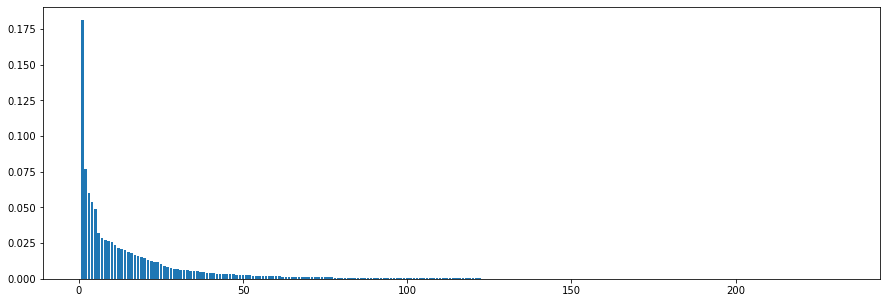

In [39]:
# plotting eigen values 
plt.figure(figsize=(15,5))
#%matplotlib inline
plt.bar(range(1,len(exp_var)+1),exp_var)
#plt.plot(range(1,len(raw_data.columns)+1),exp_var)


In [23]:
#In first model lets consider all PCs
m1=RandomForestRegressor(n_estimators=100,criterion='mse').fit(trainx_tr,trainy)

In [24]:
#predicting values
p1=m1.predict(testx_tr)
rmse1=np.round(np.sqrt(mean_squared_error(testy,p1)),2)
rmse1

34655.91

In [25]:
#Considering first 20 variables that explains 40% variation
pca=PCA(n_components=20)
trainx_tr=pca.fit_transform(trainx)
testx_tr=pca.fit_transform(testx)
exp_var=pca.explained_variance_ratio_

In [26]:
#building model
m2=RandomForestRegressor(n_estimators=100,criterion='mse').fit(trainx_tr,trainy)
#predicting
p2=m2.predict(testx_tr)
rmse2=np.round(np.sqrt(mean_squared_error(testy,p2)),2)
rmse2

36323.32

In [27]:
# considering only 10 features
pca=PCA(n_components=10)
trainx_tr=pca.fit_transform(trainx)
testx_tr=pca.fit_transform(testx)
m3=RandomForestRegressor(n_estimators=100,criterion='mse').fit(trainx_tr,trainy)
p3=m3.predict(testx_tr)
rmse3=np.round(np.sqrt(mean_squared_error(testy,p3)),2)
rmse3

37113.07

In [28]:
# considering only 5 features
pca=PCA(n_components=5)
trainx_tr=pca.fit_transform(trainx)
testx_tr=pca.fit_transform(testx)
m4=RandomForestRegressor(n_estimators=100,criterion='mse').fit(trainx_tr,trainy)
p4=m4.predict(testx_tr)
rmse4=np.round(np.sqrt(mean_squared_error(testy,p4)),2)
rmse4

37155.37

In [29]:
# Comparing it with random forest model with original data
m5=RandomForestRegressor(n_estimators=100,criterion='mse').fit(trainx_tr,trainy)
p5=m5.predict(testx_tr)
rmse5=np.round(np.sqrt(mean_squared_error(testy,p5)),2)
rmse5

37598.68

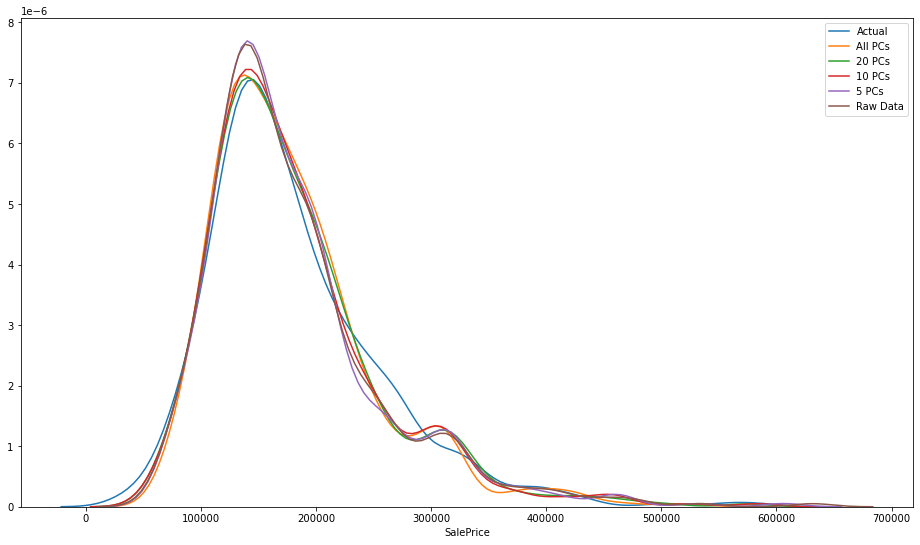

In [30]:
plt.figure(figsize=(16,9))
ax=sns.distplot(testy,hist=False,label='Actual')
sns.distplot(p1,hist=False,label='All PCs',ax=ax)
sns.distplot(p2,hist=False,label='20 PCs',ax=ax)
sns.distplot(p3,hist=False,label='10 PCs',ax=ax)
sns.distplot(p4,hist=False,label='5 PCs',ax=ax)
sns.distplot(p5,hist=False,label='Raw Data',ax=ax)

In [31]:
result=pd.DataFrame({'Model':['All Principal components','20 Principal Components','10 Principal Components',
                              '5 Principal Components','Raw Data'],
                    'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5]})
result.head()

,Model,RMSE
0,All Principal components,34655.91
1,20 Principal Components,36323.32
2,10 Principal Components,37113.07
3,5 Principal Components,37155.37
4,Raw Data,37598.68
